# Himanshu Bairagi (22CE02010)

Assignment:1     CAD LAB                                
____________________________________________________________________________________________

# Question:1
 Consider that the height of a hill is described by the given scalar field as
# h(x, y) = 200 − x2 − 2y2

(a) Plot the given scalar field as both a three-dimensional (3D) surface plot and a two-dimensional (2D)
contour plot using Julia. (you may use the package Plots.jl for plotting).


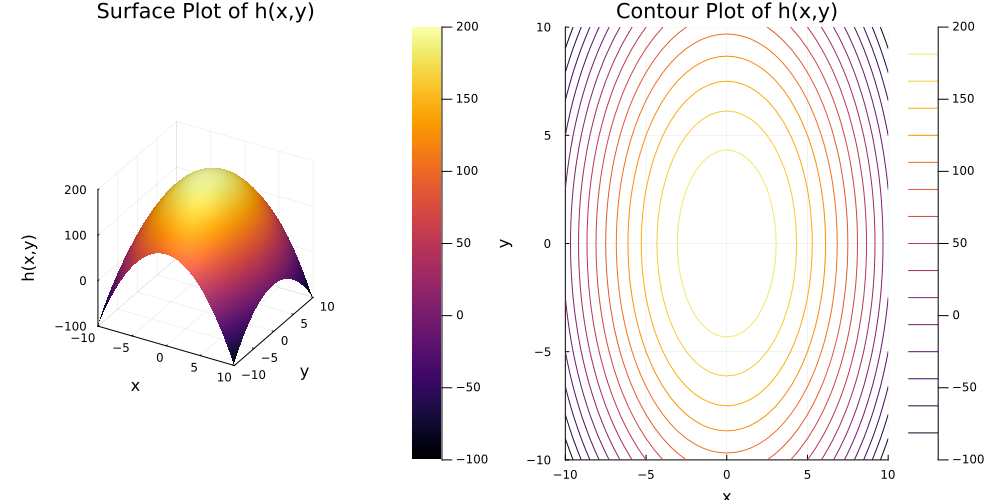

In [1]:
using Plots
gr()   

h(x,y) = 200 - x^2 - 2y^2

# range for x and y
x = -10:0.5:10
y = -10:0.5:10

# Evaluating field
z = [h(xi, yi) for xi in x, yi in y]

# Surface plot
p1 = surface(x, y, z, title="Surface Plot of h(x,y)",
             xlabel="x", ylabel="y", zlabel="h(x,y)")

# Contour plot
p2 = contour(x, y, z, title="Contour Plot of h(x,y)",
             xlabel="x", ylabel="y")

# Combine as subplots
plot(p1, p2, layout=(1,2), size=(1000,500))


(b) Plot the gradient of the scalar field using the automatic gradient calculation tool available in Julia
(you may use the package called CalculusWithJulia.jl).

In [ ]:
using Plots
gr()

# Automatic gradient using CalculusWithJulia (falls back to ForwardDiff if needed)
# This tries to use CalculusWithJulia.gradient(f, [x,y]) when available; otherwise uses ForwardDiff.gradient.

# Define scalar field as a function of a 2-vector for numeric gradient routines
f_vec = z -> 200 - z[1]^2 - 2*z[2]^2

has_calc = false
try
    @eval using CalculusWithJulia
    has_calc = :gradient in names(CalculusWithJulia)
catch err
    # CalculusWithJulia not available in this environment
    has_calc = false
end

if has_calc
    # Use CalculusWithJulia.gradient(f, xvec)
    grad_fn = (x,y) -> CalculusWithJulia.gradient(f_vec, [x,y])
else
    # Fallback: use ForwardDiff to compute the gradient numerically
    try
        @eval using ForwardDiff
    catch err
        error("Install CalculusWithJulia.jl or ForwardDiff.jl before running this cell.")
    end
    grad_fn = (x,y) -> ForwardDiff.gradient(f_vec, [x,y])
end

# Prepare grid
xs = -10:2:10
ys = -10:2:10

u = [ begin
        g = grad_fn(xi, yi)
        g[1]
     end for xi in xs, yi in ys ]

v = [ begin
        g = grad_fn(xi, yi)
        g[2]
     end for xi in xs, yi in ys ]

quiver(xs, ys, quiver=(u,v),
       title="Gradient vector field ∇h(x,y) (automatic)",
       xlabel="x", ylabel="y", aspect_ratio=:equal)


LoadError: UndefVarError: `∇h` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

2-element Vector{Num}:
 -2x
 -4y

(c) Determine the gradient vector and plot the obtained gradient vector field (you may use the package
called Plots.jl or CalculusWithJulia.jl). [20]


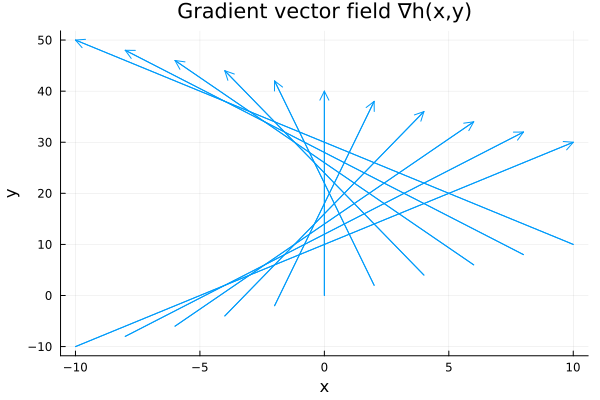

In [ ]:
using CalculusWithJulia
# Define gradient components
hx(x,y) = -2x
hy(x,y) = -4y

# Sample grid for vector field
xs = -10:2:10
ys = -10:2:10

u = [hx(xi, yi) for xi in xs, yi in ys]
v = [hy(xi, yi) for xi in xs, yi in ys]

# Quiver plot
quiver(xs, ys, quiver=(u,v),
       title="Gradient vector field ∇h(x,y)",
       xlabel="x", ylabel="y")


# Question 2
Consider a cyclone in the northern hemisphere described by the velocity vector field of the wind:

#  v(x,y) = xe1 −y^2e2

 where x and y are the coordinates in the horizontal plane, and e1 and e2 are unit vectors in the x- and
 y-directions, respectively.

(a) Plot the given vector field in Julia. (you may use the package called Plots.jl or CalculusWithJulia.jl).